### Using Kaggle API to directly access its datasets

In [9]:
# install kaggle
!pip install kaggle

^C
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/bin/pip", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_internal/cli/main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", l

In [ ]:
# initialise token on kaggle profile
!mkdir ~/.kaggle

mkdir: /Users/abhishekjain/.kaggle: File exists


In [ ]:
# copy kaggle.json file to the required folder
!cp /Users/abhishekjain/Downloads/kaggle.json  /Users/abhishekjain/.kaggle/kaggle.json


In [ ]:
# check if kaggle.json is there
!cd  /Users/abhishekjain/.kaggle/&& ls

kaggle.json


In [ ]:
# search for list of datasets with matching keyword
!kaggle datasets list -s 'Student Performance in exams'

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
joebeachcapital/students-performance                            Students Performance                                 5KB  2023-10-17 01:32:37          11385        244  1.0              
fiq423ubf/cbse-result-statistics-class-xii-2023                 CBSE Result Statistics Class XII - 2023             881B  2023-08-22 08:50:16            903         48  1.0              
atharvbharaskar/students-test-data                              Students Test Data                                   4KB  2023-09-12 10:07:18           2946         51  1.0              
noriuk/us-education-datasets-unification-project                U

In [ ]:
# download the dataset you require
!kaggle datasets download -d 'sokchealay/student-performance-in-exams'

student-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip the dataset
!unzip student-performance-in-exams.zip -d data/

Archive:  student-performance-in-exams.zip
replace data/exams.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### EDA of Student Performance In Exams

In [10]:
import pandas as pd
df = pd.read_csv('data/exams.csv')

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [12]:
df.shape

(1000, 8)

### Data Checks To Perform
1. Check Missing value
2. Check Duplicates
3. Check Data type
4. Check Number of unique values of each column
5. Check Statistics of dataset
6. check various categories present in the different categorical column 

In [13]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [15]:
df = df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [17]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [18]:
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


### Insights or Observations
1. all means are very close to each other bw 66 - 68
2. all std dev are close bw 15-16


In [26]:
# seperate continous features from discrete features
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
numerical_features = [features for features in df.columns if df[features].dtype != 'O']

In [27]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [28]:
numerical_features

['math score', 'reading score', 'writing score']

In [30]:
# Aggregate the total score with mean

df['total_score'] = (df['math score']+df['reading score']+df['writing score'])
df['average'] = df['total_score']/3

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group A,high school,standard,completed,67,67,63,197,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,154,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,169,56.333333
3,male,group B,high school,standard,none,77,78,68,223,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,219,73.000000


<Axes: xlabel='average', ylabel='Count'>

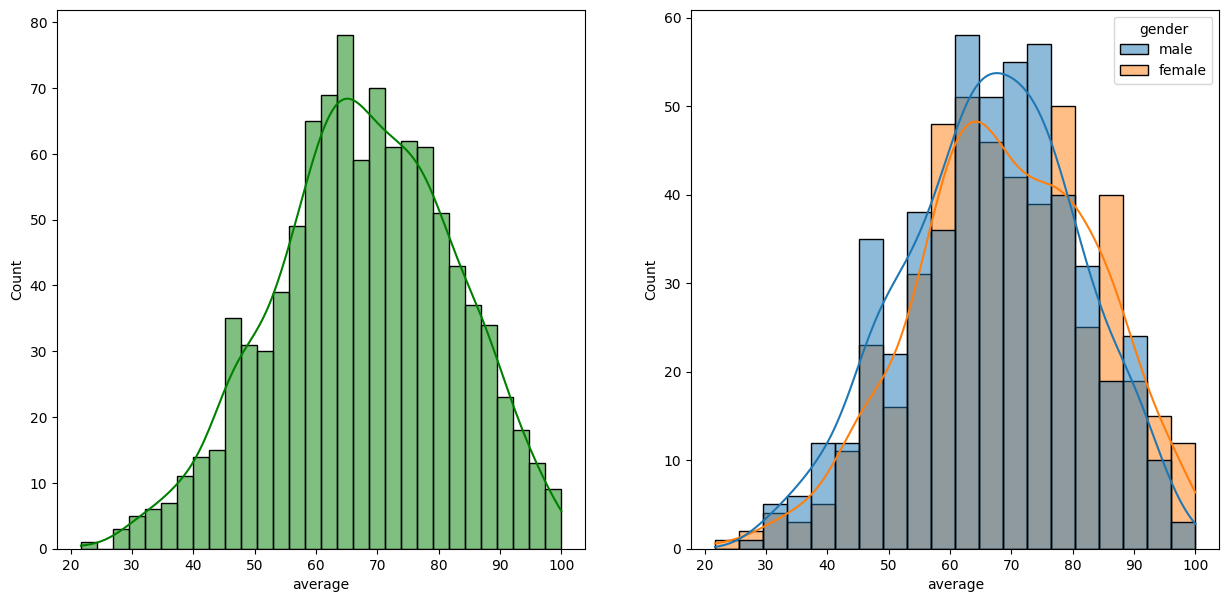

In [34]:
## Explore more visualizations
import matplotlib.pyplot as plt
import seaborn as sbn

#we create 1 figure 2 graphs
fig,axis = plt.subplots(1,2,figsize = (15,7))

# 121 means 1 fig 2 graphs location 1
plt.subplot(121)

sbn.histplot(data = df,x = 'average',bins= 30,kde= True,color='g')

# 122
plt.subplot(122)
sbn.histplot(data=df,x = 'average',hue='gender',kde = True)


## Insight : We can see that males have better scores than females

<Axes: xlabel='average', ylabel='Count'>

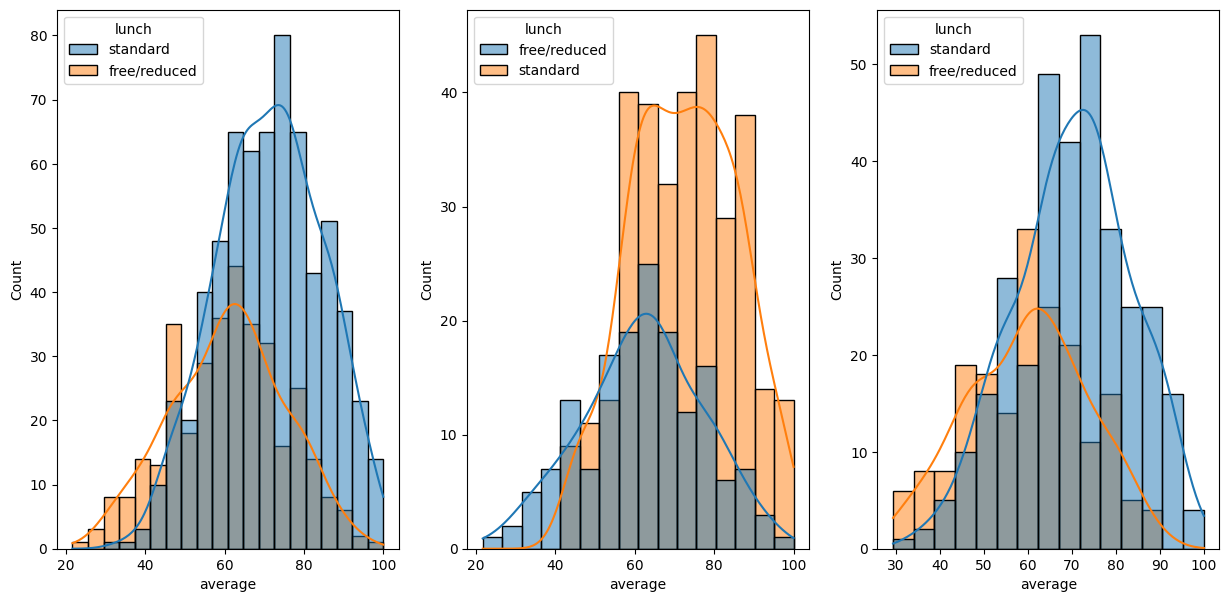

In [41]:
# effect of lunch on avg scores
#we create 1 figure 2 graphs
fig,axis = plt.subplots(1,3,figsize = (15,7))

# 131 means 1 fig 3 graphs location 1
plt.subplot(131)

sbn.histplot(data=df,x = 'average',hue='lunch',kde = True)

plt.subplot(132)

sbn.histplot(data=df[df['gender']=='female'],x = 'average',hue='lunch',kde = True)

plt.subplot(133)

sbn.histplot(data=df[df['gender']=='male'],x = 'average',hue='lunch',kde = True)

# Insight: Standard luch helps student perform well in exams


<Axes: xlabel='average', ylabel='Count'>

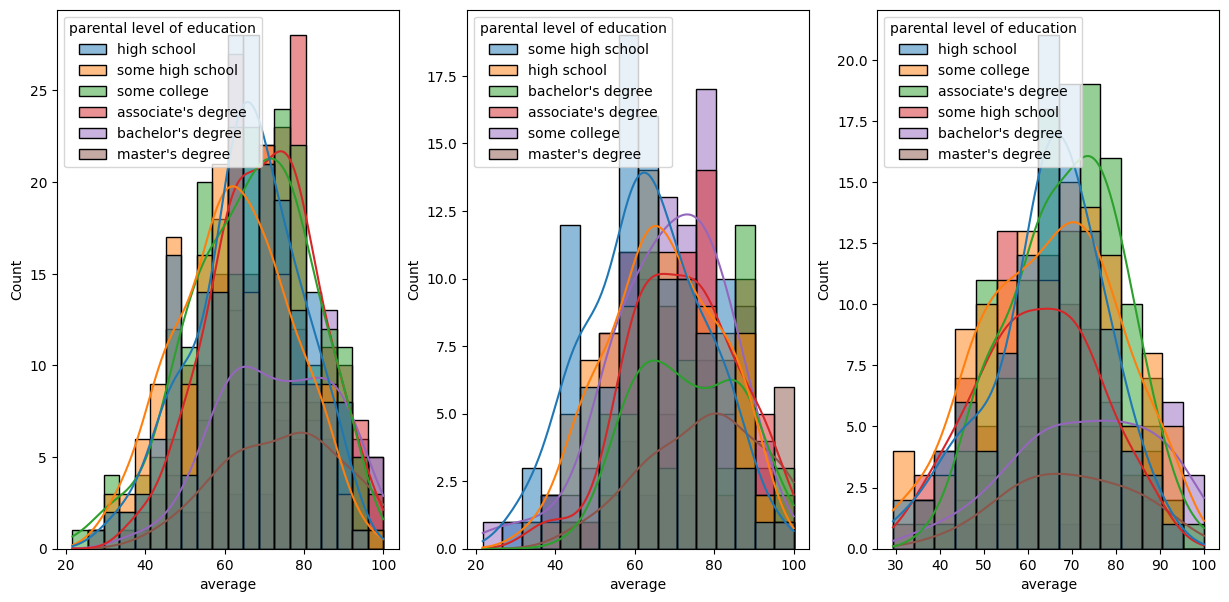

In [42]:
# effect of parents eductation on avg scores
#we create 1 figure 2 graphs
fig,axis = plt.subplots(1,3,figsize = (15,7))

# 131 means 1 fig 3 graphs location 1
plt.subplot(131)

sbn.histplot(data=df,x = 'average',hue='parental level of education',kde = True)

plt.subplot(132)

sbn.histplot(data=df[df['gender']=='female'],x = 'average',hue='parental level of education',kde = True)

plt.subplot(133)

sbn.histplot(data=df[df['gender']=='male'],x = 'average',hue='parental level of education',kde = True)

# Insight: In general parents eduction doesnt effects student performance
# in females and males, parents with associate degree have there students perform slightly better


<Axes: xlabel='average', ylabel='Count'>

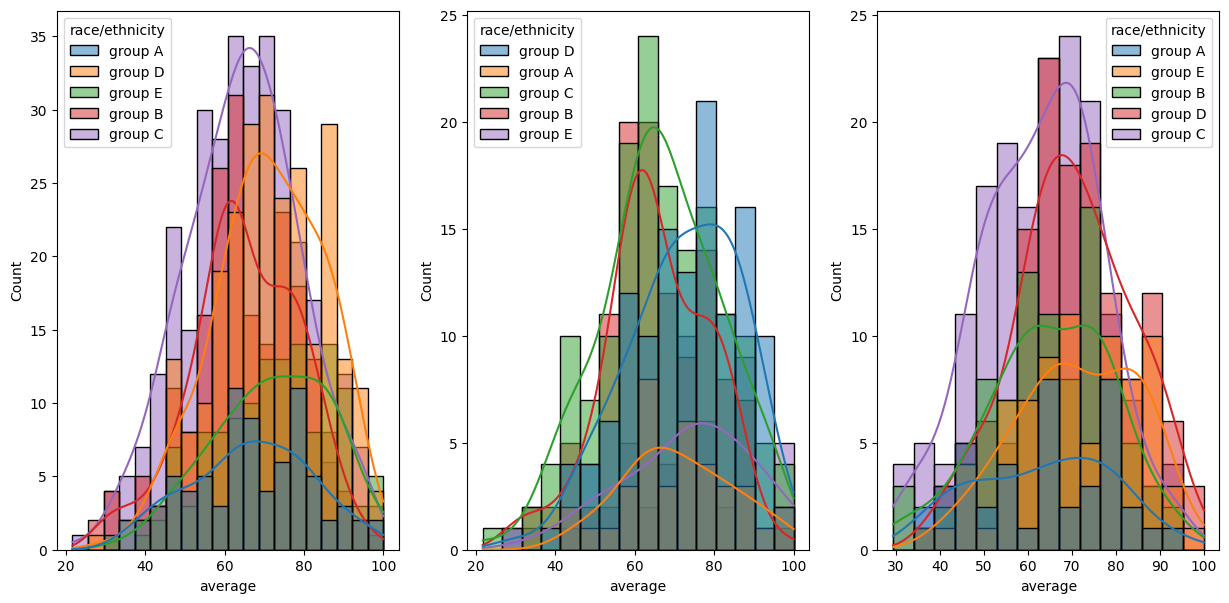

In [43]:
# effect of ethnicity group on avg scores
#we create 1 figure 2 graphs
fig,axis = plt.subplots(1,3,figsize = (15,7))

# 131 means 1 fig 3 graphs location 1
plt.subplot(131)

sbn.histplot(data=df,x = 'average',hue='race/ethnicity',kde = True)

plt.subplot(132)

sbn.histplot(data=df[df['gender']=='female'],x = 'average',hue='race/ethnicity',kde = True)

plt.subplot(133)

sbn.histplot(data=df[df['gender']=='male'],x = 'average',hue='race/ethnicity',kde = True)

# Insight : Doesnt effects student performance

/var/folders/lw/97p97tps55bddkd_rvpmy8400000gn/T/ipykernel_2236/3326607171.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(data = df.corr(),annot= True)


<Axes: >

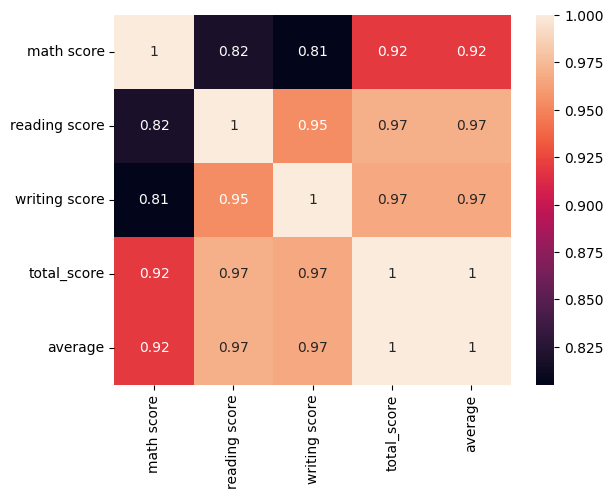

In [44]:
# lets see numerical features correlation

sbn.heatmap(data = df.corr(),annot= True)

# Insight : we can see a really good possitive correlation